In [ ]:


#import packages needed 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt



In [ ]:
#reading the data 
df_CE802_P3 = pd.read_csv('/content/CE802_P3_Data.csv')
df_CE802_P3.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,16.56,12.42,-236.06,Rest,-98.88,529.56,4.54,379.54,1,1,7.30,High,-15085.87,-12.93,-39.42,1734.58,3616.82
1,11.72,12.46,-190.06,Rest,-59.22,493.11,0.05,402.78,5,3,-1.28,Very low,-15782.44,-8.55,-35.61,1672.70,3342.88
2,4.34,2.74,-201.20,UK,-228.48,563.79,1.22,147.35,4,4,8.28,Low,-10526.01,-9.66,-29.10,1462.86,0.00
3,12.76,2.58,-282.26,UK,-173.28,536.94,0.25,113.49,4,3,6.26,Low,-8327.14,-19.23,-34.59,809.46,1742.65
4,11.10,9.82,-242.86,USA,-193.14,617.52,9.15,343.64,8,6,-6.88,Very low,-14434.13,-9.45,-46.14,1435.90,373.56
5,6.36,4.48,-151.96,Rest,-331.80,1043.19,63.10,-170.49,7,5,12.68,Very low,-13858.77,-15.18,-36.30,2384.08,0.00
6,5.30,1.00,-189.06,USA,-336.33,472.56,2.19,290.55,9,3,-0.32,Very high,-17261.41,-15.00,-32.88,1384.70,173.96
7,4.18,10.96,-207.24,Europe,-198.81,568.05,38.18,-202.04,5,2,0.52,High,-10742.10,-9.66,-41.52,1669.36,1661.04
8,10.98,5.68,-241.58,UK,-121.62,498.21,8.78,-152.50,2,2,0.78,High,-13952.70,-3.69,-27.84,2268.44,2135.45
9,11.76,6.90,-156.24,USA,-201.60,574.59,0.95,88.56,7,4,1.42,High,-30289.83,-13.86,-34.77,820.86,1088.68


In [ ]:
#checking the structures of the data 
df_CE802_P3.describe

<bound method NDFrame.describe of          F1     F2      F3      F4  ...    F14    F15      F16   Target
0     16.56  12.42 -236.06    Rest  ... -12.93 -39.42  1734.58  3616.82
1     11.72  12.46 -190.06    Rest  ...  -8.55 -35.61  1672.70  3342.88
2      4.34   2.74 -201.20      UK  ...  -9.66 -29.10  1462.86     0.00
3     12.76   2.58 -282.26      UK  ... -19.23 -34.59   809.46  1742.65
4     11.10   9.82 -242.86     USA  ...  -9.45 -46.14  1435.90   373.56
...     ...    ...     ...     ...  ...    ...    ...      ...      ...
1495   5.20   4.70 -218.72    Rest  ...   5.01 -29.67  1420.16  1515.56
1496  12.10   2.98 -144.42      UK  ...   0.66 -36.06  1321.82  1528.48
1497   4.12   4.36 -160.30  Europe  ...  -7.68 -39.42  1905.86   323.67
1498   1.58  13.50 -159.60     USA  ...  -3.12 -54.36  2424.42   109.19
1499   5.60   2.76 -211.30      UK  ...  -0.36 -46.98  2222.52     0.00

[1500 rows x 17 columns]>

In [ ]:
#checking the datatypes 
df_CE802_P3.dtypes

F1        float64
F2        float64
F3        float64
F4         object
F5        float64
F6        float64
F7        float64
F8        float64
F9          int64
F10         int64
F11       float64
F12        object
F13       float64
F14       float64
F15       float64
F16       float64
Target    float64
dtype: object

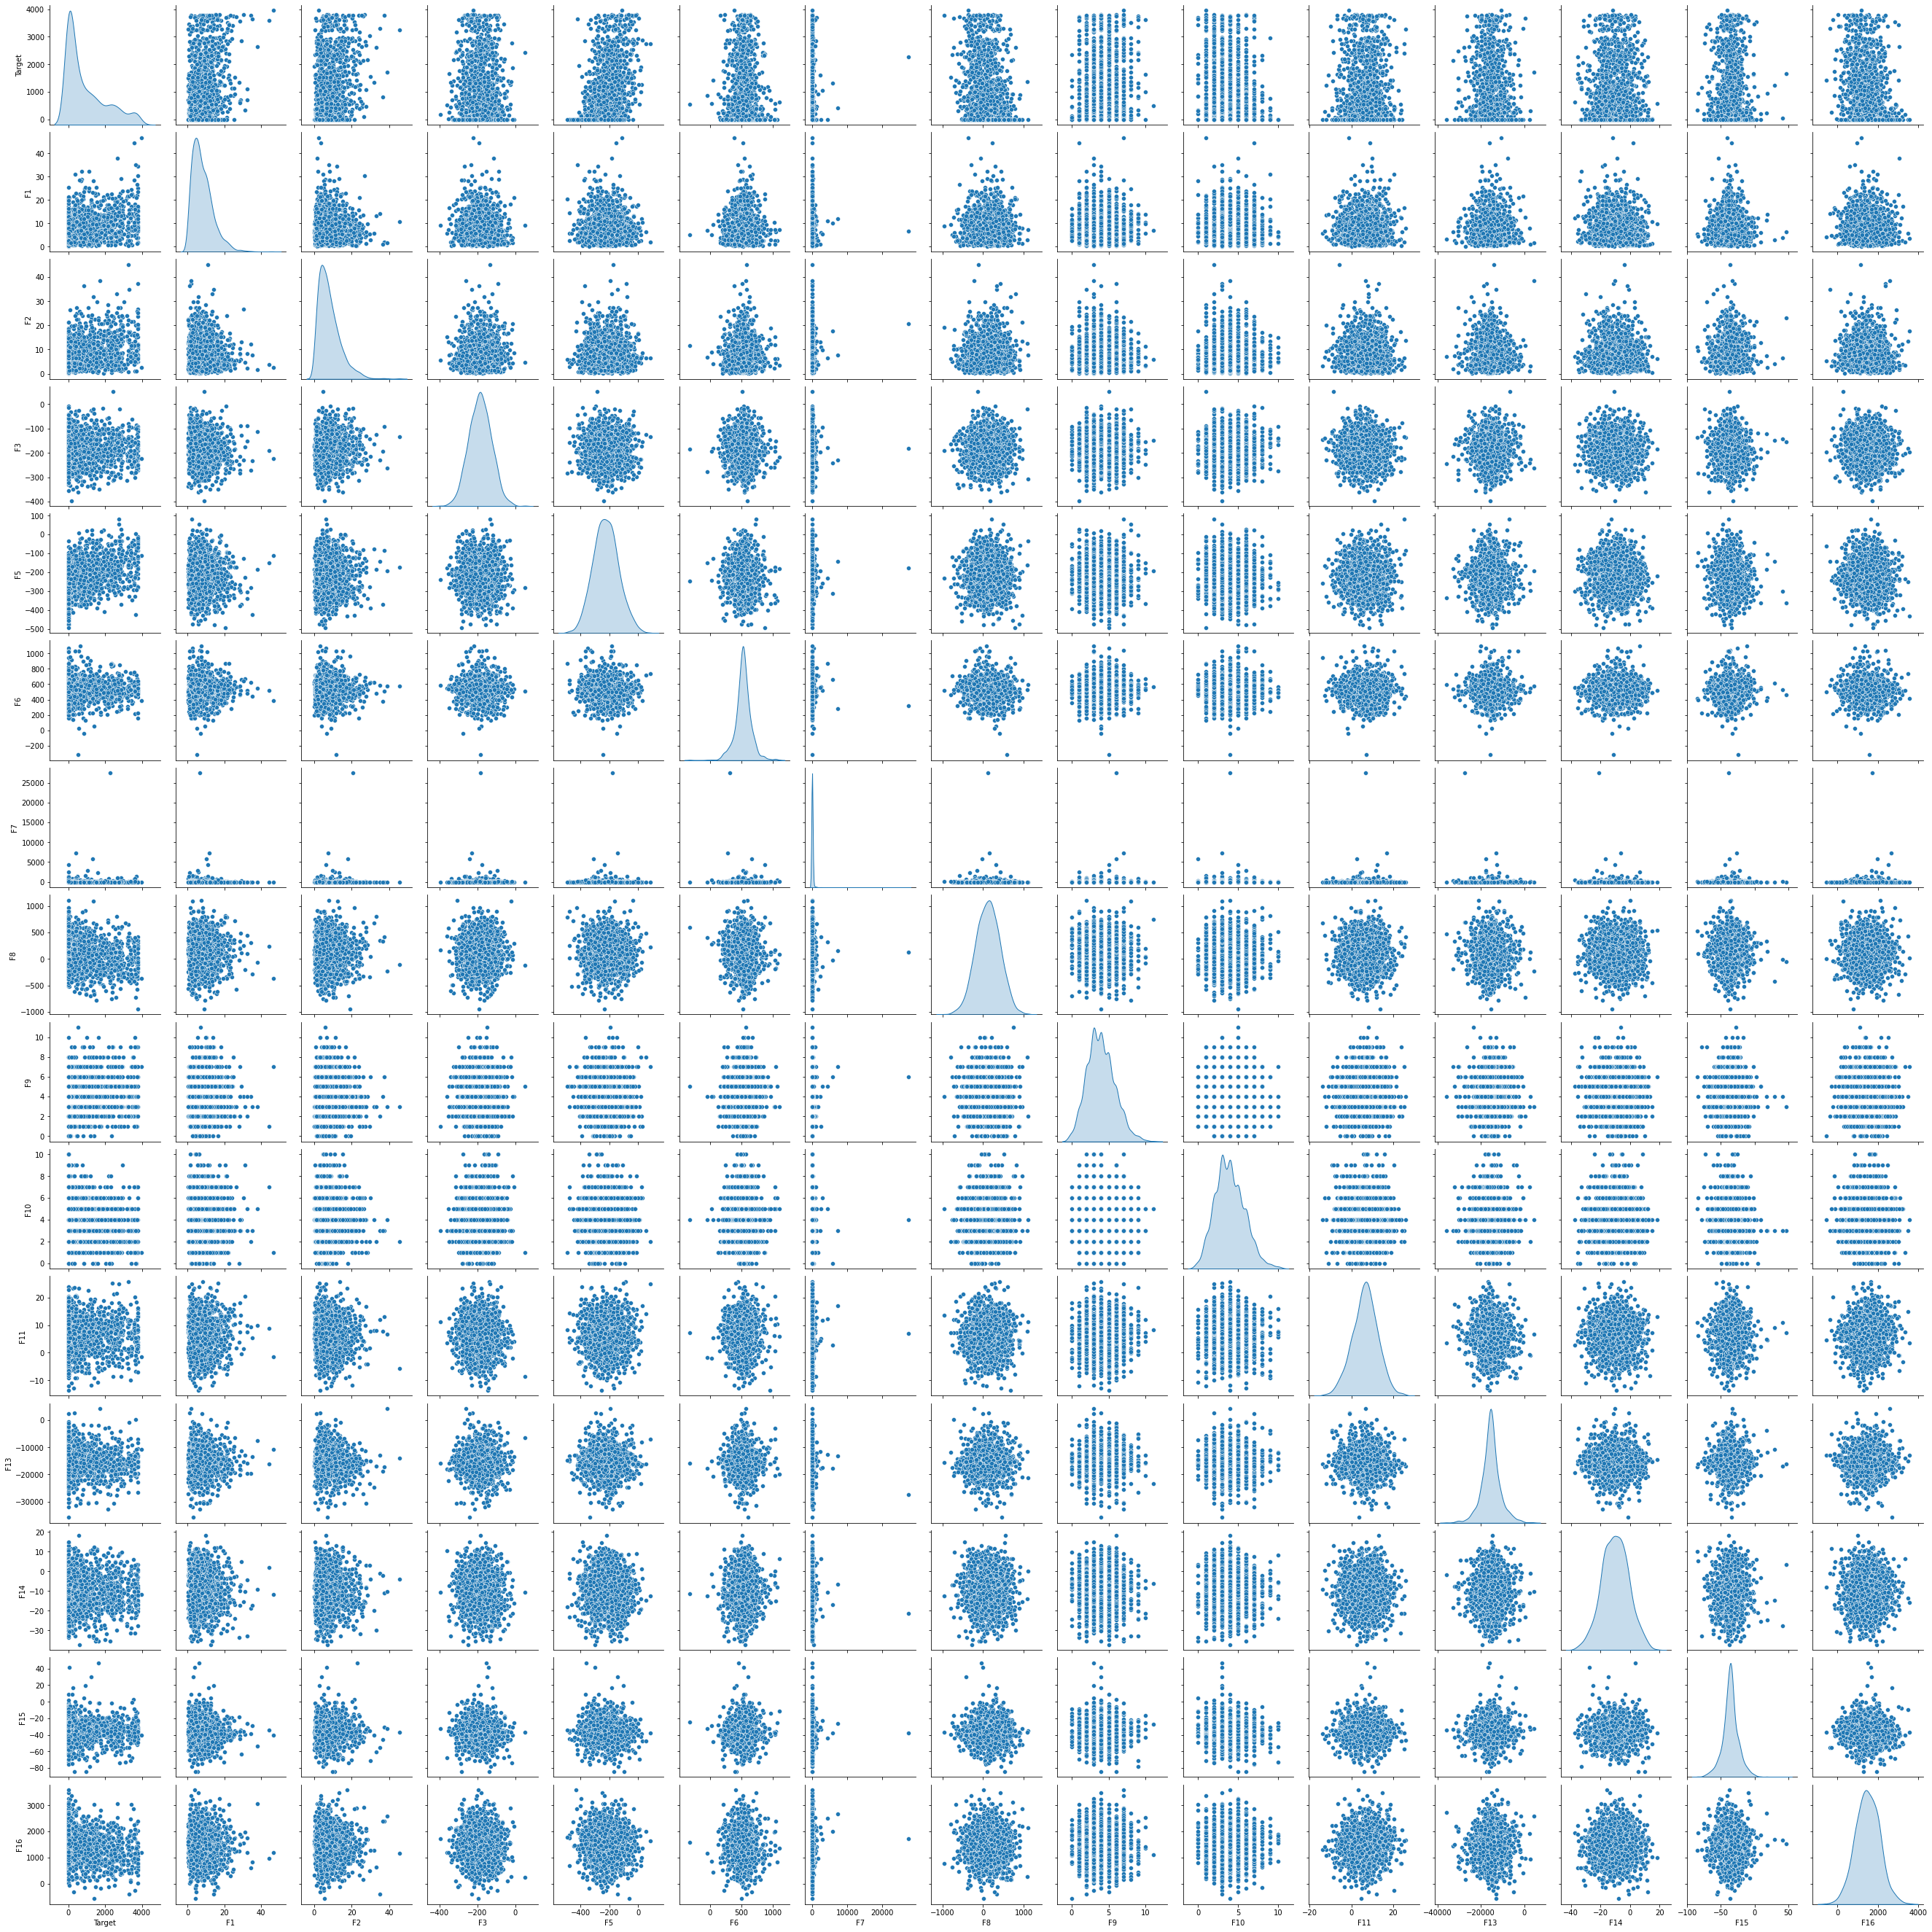

In [ ]:
#data visulistaion to examine false predictors 
sns.pairplot(df_CE802_P3[['Target', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9',  'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16']], diag_kind='kde')

In [ ]:
#creating a correlation table of the features and target 
corr_tab = df_CE802_P3.loc[:, ['Target', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9',  'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16' ]].corr()
corr_tab 

,Target,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,F13,F14,F15,F16
Target,1.000000,0.346373,0.357137,-0.015412,0.430990,0.031407,0.027713,-0.300890,0.193704,-0.236200,0.011330,-0.029194,-0.020443,-0.018677,-0.263022
F1,0.346373,1.000000,-0.022325,-0.050148,0.000099,0.014407,-0.005763,0.001317,0.003647,0.005589,0.021228,0.007184,-0.009609,-0.036053,-0.041882
F2,0.357137,-0.022325,1.000000,0.017902,0.046542,0.026478,0.059413,-0.005397,-0.028201,-0.013474,-0.018861,-0.060349,-0.037862,-0.032430,-0.012850
F3,-0.015412,-0.050148,0.017902,1.000000,-0.012594,0.002309,-0.006548,-0.001042,-0.000822,0.064451,0.004979,0.013438,0.012025,-0.035125,-0.061850
F5,0.430990,0.000099,0.046542,-0.012594,1.000000,-0.009240,0.011987,-0.006295,-0.018839,-0.011457,-0.012457,-0.007560,-0.000302,-0.027557,-0.051243
F6,0.031407,0.014407,0.026478,0.002309,-0.009240,1.000000,-0.027544,-0.072085,0.016949,0.007359,0.008484,0.012488,0.031183,0.006407,-0.016704
F7,0.027713,-0.005763,0.059413,-0.006548,0.011987,-0.027544,1.000000,-0.006771,0.046442,-0.013561,0.014330,-0.066430,-0.032332,-0.001758,0.040372
F8,-0.300890,0.001317,-0.005397,-0.001042,-0.006295,-0.072085,-0.006771,1.000000,-0.014783,0.013712,-0.019297,-0.010391,-0.023763,-0.033006,-0.007113
F9,0.193704,0.003647,-0.028201,-0.000822,-0.018839,0.016949,0.046442,-0.014783,1.000000,0.006516,0.026931,-0.004651,0.002310,-0.022900,0.007670
F10,-0.236200,0.005589,-0.013474,0.064451,-0.011457,0.007359,-0.013561,0.013712,0.006516,1.000000,0.006276,-0.004620,0.004793,-0.049907,-0.002825


In [ ]:
#creating dataframne for classifier ML
df_CE802_P3_Classifier = df_CE802_P3.copy()

In [ ]:
#generating dummy variables from the catagorical variables
df_CE802_P3_Classifier = pd.get_dummies(df_CE802_P3_Classifier)

print(df_CE802_P3_Classifier.head(10))
df_CE802_P3_Classifier.dtypes

      F1     F2      F3  ...  F12_Medium  F12_Very high  F12_Very low
0  16.56  12.42 -236.06  ...           0              0             0
1  11.72  12.46 -190.06  ...           0              0             1
2   4.34   2.74 -201.20  ...           0              0             0
3  12.76   2.58 -282.26  ...           0              0             0
4  11.10   9.82 -242.86  ...           0              0             1
5   6.36   4.48 -151.96  ...           0              0             1
6   5.30   1.00 -189.06  ...           0              1             0
7   4.18  10.96 -207.24  ...           0              0             0
8  10.98   5.68 -241.58  ...           0              0             0
9  11.76   6.90 -156.24  ...           0              0             0

[10 rows x 24 columns]


F1               float64
F2               float64
F3               float64
F5               float64
F6               float64
F7               float64
F8               float64
F9                 int64
F10                int64
F11              float64
F13              float64
F14              float64
F15              float64
F16              float64
Target           float64
F4_Europe          uint8
F4_Rest            uint8
F4_UK              uint8
F4_USA             uint8
F12_High           uint8
F12_Low            uint8
F12_Medium         uint8
F12_Very high      uint8
F12_Very low       uint8
dtype: object

In [ ]:
#seperating the prediction features from the classification feature 

df_CE802_P3_Classifier['Target'] = np.where((df_CE802_P3_Classifier.Target != 0), 1 , df_CE802_P3_Classifier.Target)
X_class = df_CE802_P3_Classifier.loc[:, df_CE802_P3_Classifier.columns != 'Target'].to_numpy()
y_class = df_CE802_P3_Classifier.loc[:, 'Target'].to_numpy()
print(X_class.shape, y_class.shape)
y_class[:50]

(1500, 23) (1500,)


array([1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.])

In [ ]:
#Cross validation, data preprocessing and normalisation 
from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import svm

SVM_score =[]
log_score = []

strat_k_fold = StratifiedKFold(n_splits=10)


logitmod = LogisticRegression()

X_class_copy = X_class.copy()
for train_indices, test_indices in strat_k_fold.split(X_class, y_class):
    stan_scal = StandardScaler()
    stan_scal.fit(X_class[train_indices, :])
    X_class_train = stan_scal.transform(X_class[train_indices, :])
    X_class_test = stan_scal.transform(X_class[test_indices, :])
    y_class_train = y_class[train_indices]
    y_class_test = y_class[test_indices]

    logitmod.fit(X_class_train, y_class_train) 
    log_score.append(logitmod.score(X_class_test, y_class_test))

print('Logistic Regression Accuracy: %.4f' % (np.mean(log_score)))

Logistic Regression Accuracy: 0.9860


In [ ]:
y_class_train.shape, y_class_test.shape, X_class_train.shape, X_class_test.shape

((1350,), (150,), (1350, 23), (150, 23))

In [ ]:
#creating dataframe for the Regression algorithms 
df_CE802_P3_Regression = df_CE802_P3.copy()

In [ ]:
#generating dummy variables from the catagorical variables
df_CE802_P3_Regression = pd.get_dummies(df_CE802_P3_Regression)
df_CE802_P3_Regression

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,F13,F14,F15,F16,Target,F4_Europe,F4_Rest,F4_UK,F4_USA,F12_High,F12_Low,F12_Medium,F12_Very high,F12_Very low
0,16.56,12.42,-236.06,-98.88,529.56,4.54,379.54,1,1,7.30,-15085.87,-12.93,-39.42,1734.58,3616.82,0,1,0,0,1,0,0,0,0
1,11.72,12.46,-190.06,-59.22,493.11,0.05,402.78,5,3,-1.28,-15782.44,-8.55,-35.61,1672.70,3342.88,0,1,0,0,0,0,0,0,1
2,4.34,2.74,-201.20,-228.48,563.79,1.22,147.35,4,4,8.28,-10526.01,-9.66,-29.10,1462.86,0.00,0,0,1,0,0,1,0,0,0
3,12.76,2.58,-282.26,-173.28,536.94,0.25,113.49,4,3,6.26,-8327.14,-19.23,-34.59,809.46,1742.65,0,0,1,0,0,1,0,0,0
4,11.10,9.82,-242.86,-193.14,617.52,9.15,343.64,8,6,-6.88,-14434.13,-9.45,-46.14,1435.90,373.56,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5.20,4.70,-218.72,-224.04,539.91,8.23,-232.93,2,3,12.32,-16977.67,5.01,-29.67,1420.16,1515.56,0,1,0,0,0,0,0,1,0
1496,12.10,2.98,-144.42,-76.05,736.65,0.48,90.41,3,6,7.40,-13927.89,0.66,-36.06,1321.82,1528.48,0,0,1,0,0,0,1,0,0
1497,4.12,4.36,-160.30,-230.43,439.86,0.69,-224.44,3,3,7.02,-18373.26,-7.68,-39.42,1905.86,323.67,1,0,0,0,0,0,1,0,0
1498,1.58,13.50,-159.60,-233.85,572.58,0.29,-126.79,1,5,1.68,-22863.72,-3.12,-54.36,2424.42,109.19,0,0,0,1,0,0,0,1,0


In [ ]:
#seperating the prediction features from the classification feature 

df_CE802_P3_Regression = df_CE802_P3_Regression[df_CE802_P3_Regression['Target'] != 0]
X_reg = df_CE802_P3_Regression.loc[:, df_CE802_P3_Regression.columns != 'Target'].to_numpy()
y_reg = df_CE802_P3_Regression.loc[:, 'Target'].to_numpy()
print(X_reg.shape, y_reg.shape)

(1053, 23) (1053,)


In [ ]:
#Cross validation, data preprocessing and normalisation 

from sklearn.model_selection import KFold

#importing models 
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler

#creating lsit for cross-val scores
MLR_scores = []
DTR_scores = []
RFR_scores = []

#building models 
DT_model = DecisionTreeRegressor()
MLR_model = linear_model.LinearRegression()
RF_model = RandomForestRegressor()
k_fold = KFold(n_splits=10)

#normalising, adding mean and splitting data into train/test
X_reg_copy = X_reg.copy() # We make a copy of our data to avoid overwriting
for train_indices, test_indices in k_fold.split(X_reg, y_reg):
    minmax_scal = MinMaxScaler()
    minmax_scal.fit(X_reg[train_indices, :])
    X_reg_train = minmax_scal.transform(X_reg[train_indices, :])
    X_reg_test = minmax_scal.transform(X_reg[test_indices, :])
    y_reg_train = y_reg[train_indices]
    y_reg_test = y_reg[test_indices]

    #fitting the model and retrieving the accyracy scores 
    MLR_model.fit (X_reg_train, y_reg_train)
    MLR_scores.append(MLR_model.score(X_reg_test, y_reg_test))
    
    DT_model.fit(X_reg_train, y_reg_train)
    DTR_scores.append(DT_model.score(X_reg_test, y_reg_test))
    
    RF_model.fit(X_reg_train, y_reg_train)
    RFR_scores.append(RF_model.score(X_reg_test, y_reg_test))

#printing the cross val mean r2 score
print('Multiple Linear Regression r2 Score: %.4f' % (np.mean(MLR_scores)))
print('Decision Tree Regressor r2 Score: %.4f' % (np.mean(DTR_scores)))
print('Random Forest Regressor r2 Score: %.4f' % (np.mean(RFR_scores)))






Multiple Linear Regression r2 Score: 0.8577
Decision Tree Regressor r2 Score: 0.2850
Random Forest Regressor r2 Score: 0.6374


In [ ]:
#reading unseen data 
df_unseen = pd.read_csv('/content/CE802_P3_Test.csv')
df_unseen.head(20)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,Low,-14794.01,-15.09,-35.61,1578.68,NaN
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,Medium,-11632.88,0.72,-29.73,1647.02,NaN
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,Low,-12631.29,-23.61,-32.73,1449.14,NaN
3,10.52,1.02,-184.14,UK,-211.23,506.55,0.57,-311.96,7,5,1.92,High,-26664.88,1.80,-22.92,911.98,NaN
4,2.00,0.58,-190.56,Rest,-284.82,649.41,0.05,291.47,8,3,-0.02,Low,-9901.41,-13.47,-48.81,2251.04,NaN
5,6.88,10.08,-152.68,Europe,-25.44,552.48,0.04,-45.70,2,3,13.46,Very high,-13981.56,-16.23,-43.65,1794.62,NaN
6,6.90,8.64,-137.02,UK,-196.29,484.35,0.17,295.68,4,5,10.18,High,-16991.80,-0.60,-37.53,1883.68,NaN
7,4.94,6.58,-174.58,UK,-46.59,521.73,0.00,163.00,2,7,3.80,High,-20337.81,-1.38,-37.11,1809.20,NaN
8,4.32,9.62,-218.96,UK,-272.67,636.09,2.32,464.36,3,5,7.72,Medium,-15804.53,-8.16,-31.62,1612.52,NaN
9,10.74,11.60,-113.76,UK,-218.49,446.67,3.89,-241.92,5,3,11.26,Low,-15325.52,-9.42,-29.82,2081.48,NaN


In [ ]:
#standardising and normalising the values of unseen table 

#changing value types
df_unseen_norm = df_unseen.copy()
df_unseen_norm = pd.get_dummies(df_unseen_norm)

#seperating x and y sets
X_unseen = df_unseen_norm.loc[:, df_unseen_norm.columns != 'Target'].to_numpy()
y_unseen = df_unseen_norm.loc[:, 'Target'].to_numpy()

#normalising unseen data 
X_unseen = stan_scal.transform(X_unseen)

print(X_unseen.shape, y_unseen.shape)
df_unseen_norm, X_unseen

(1500, 23) (1500,)


(         F1     F2      F3  ...  F12_Medium  F12_Very high  F12_Very low
 0     28.70   0.82 -115.06  ...           0              0             0
 1      5.40   6.90 -170.24  ...           1              0             0
 2     21.96   4.40 -219.12  ...           0              0             0
 3     10.52   1.02 -184.14  ...           0              0             0
 4      2.00   0.58 -190.56  ...           0              0             0
 ...     ...    ...     ...  ...         ...            ...           ...
 1495  18.42   8.22 -213.52  ...           0              1             0
 1496  12.06  14.46 -251.02  ...           0              0             1
 1497   6.54  10.42 -156.28  ...           0              0             0
 1498   8.06  13.34 -211.82  ...           1              0             0
 1499   2.84   2.66 -286.80  ...           0              0             1
 
 [1500 rows x 24 columns],
 array([[ 3.530561  , -1.26143009,  1.18248096, ..., -0.49188446,
         -0.47438

In [ ]:
#predicting 0 and non-0 values using logistic regression 
pred_unseen_log = logitmod.predict(X_unseen)
pred_unseen_log[:50]

#constructing dataframe
df_pred_target = pd.DataFrame(pred_unseen_log)
df_pred_target


,0
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
1495,1.0
1496,1.0
1497,1.0
1498,0.0


In [ ]:
#merging dataframe with prediucted values 

df_pred_merge = pd.merge(df_unseen_norm.copy(), df_pred_target, left_index = True, right_index = True)
df_pred_merge.drop('Target', inplace= True, axis = 1)
df_pred_merge.rename({0:'class_target'}, inplace= True, axis = 1)
df_pred_merge

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,F13,F14,F15,F16,F4_Europe,F4_Rest,F4_UK,F4_USA,F12_High,F12_Low,F12_Medium,F12_Very high,F12_Very low,class_target
0,28.70,0.82,-115.06,-280.95,581.10,0.06,214.35,2,2,-0.88,-14794.01,-15.09,-35.61,1578.68,0,0,0,1,0,1,0,0,0,1.0
1,5.40,6.90,-170.24,-228.00,330.54,0.31,-164.98,1,9,0.28,-11632.88,0.72,-29.73,1647.02,0,1,0,0,0,0,1,0,0,0.0
2,21.96,4.40,-219.12,-59.67,662.28,4.98,281.54,6,5,5.82,-12631.29,-23.61,-32.73,1449.14,0,1,0,0,0,1,0,0,0,1.0
3,10.52,1.02,-184.14,-211.23,506.55,0.57,-311.96,7,5,1.92,-26664.88,1.80,-22.92,911.98,0,0,1,0,1,0,0,0,0,1.0
4,2.00,0.58,-190.56,-284.82,649.41,0.05,291.47,8,3,-0.02,-9901.41,-13.47,-48.81,2251.04,0,1,0,0,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.42,8.22,-213.52,-189.33,569.43,0.09,-315.11,2,3,8.64,-16759.93,-13.56,-37.08,869.80,0,1,0,0,0,0,0,1,0,1.0
1496,12.06,14.46,-251.02,-87.90,640.32,3.67,201.37,7,8,9.34,-11645.46,-4.35,-56.10,2040.40,0,1,0,0,0,0,0,0,1,1.0
1497,6.54,10.42,-156.28,-221.82,462.30,0.00,-267.50,2,6,5.00,-23752.87,-8.37,-21.27,1130.64,1,0,0,0,0,1,0,0,0,1.0
1498,8.06,13.34,-211.82,-483.24,766.38,0.19,140.38,4,6,5.34,-13748.25,-9.21,-18.96,1261.38,0,0,1,0,0,0,1,0,0,0.0


In [ ]:
#merging non-0 values with column
df_regr_pred_1 = df_pred_merge[df_pred_merge['class_target'] == 1.0]
df_regr_pred_1

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,F13,F14,F15,F16,F4_Europe,F4_Rest,F4_UK,F4_USA,F12_High,F12_Low,F12_Medium,F12_Very high,F12_Very low,class_target
0,28.70,0.82,-115.06,-280.95,581.10,0.06,214.35,2,2,-0.88,-14794.01,-15.09,-35.61,1578.68,0,0,0,1,0,1,0,0,0,1.0
2,21.96,4.40,-219.12,-59.67,662.28,4.98,281.54,6,5,5.82,-12631.29,-23.61,-32.73,1449.14,0,1,0,0,0,1,0,0,0,1.0
3,10.52,1.02,-184.14,-211.23,506.55,0.57,-311.96,7,5,1.92,-26664.88,1.80,-22.92,911.98,0,0,1,0,1,0,0,0,0,1.0
5,6.88,10.08,-152.68,-25.44,552.48,0.04,-45.70,2,3,13.46,-13981.56,-16.23,-43.65,1794.62,1,0,0,0,0,0,0,1,0,1.0
6,6.90,8.64,-137.02,-196.29,484.35,0.17,295.68,4,5,10.18,-16991.80,-0.60,-37.53,1883.68,0,0,1,0,1,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,0.78,4.74,-231.10,-166.26,648.78,0.08,284.35,3,2,7.94,-15935.10,-23.76,-38.67,691.02,1,0,0,0,0,0,0,1,0,1.0
1493,17.24,1.70,-230.72,-167.55,538.83,0.01,243.21,1,3,-1.12,-19217.62,-11.46,-64.14,906.72,0,0,1,0,0,1,0,0,0,1.0
1495,18.42,8.22,-213.52,-189.33,569.43,0.09,-315.11,2,3,8.64,-16759.93,-13.56,-37.08,869.80,0,1,0,0,0,0,0,1,0,1.0
1496,12.06,14.46,-251.02,-87.90,640.32,3.67,201.37,7,8,9.34,-11645.46,-4.35,-56.10,2040.40,0,1,0,0,0,0,0,0,1,1.0


In [ ]:
#merging pred 0 values with column
df_regr_pred_0 = df_pred_merge[df_pred_merge['class_target'] == 0.0]
df_regr_pred_0

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,F13,F14,F15,F16,F4_Europe,F4_Rest,F4_UK,F4_USA,F12_High,F12_Low,F12_Medium,F12_Very high,F12_Very low,class_target
1,5.40,6.90,-170.24,-228.00,330.54,0.31,-164.98,1,9,0.28,-11632.88,0.72,-29.73,1647.02,0,1,0,0,0,0,1,0,0,0.0
4,2.00,0.58,-190.56,-284.82,649.41,0.05,291.47,8,3,-0.02,-9901.41,-13.47,-48.81,2251.04,0,1,0,0,0,1,0,0,0,0.0
8,4.32,9.62,-218.96,-272.67,636.09,2.32,464.36,3,5,7.72,-15804.53,-8.16,-31.62,1612.52,0,0,1,0,0,0,1,0,0,0.0
14,3.24,19.50,-238.88,-404.04,98.67,4.12,920.70,4,5,4.62,-9517.17,-27.78,-46.08,1202.28,0,1,0,0,0,1,0,0,0,0.0
15,3.04,3.86,-74.36,-320.85,338.61,0.10,158.43,2,1,4.64,-17837.77,3.03,-39.51,1922.92,1,0,0,0,1,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,6.00,8.52,-180.74,-123.54,303.84,0.01,119.92,1,3,11.48,-15550.53,-8.64,1.35,2353.70,0,0,1,0,0,0,0,0,1,0.0
1490,3.98,6.12,-107.30,-224.49,490.05,0.03,-12.49,4,5,5.98,-14853.84,-9.84,-35.19,2530.18,0,0,1,0,0,0,0,0,1,0.0
1494,8.64,0.28,-167.50,-405.57,452.19,5.11,-10.77,3,3,11.84,-12046.66,3.84,-35.10,1805.34,0,0,0,1,0,1,0,0,0,0.0
1498,8.06,13.34,-211.82,-483.24,766.38,0.19,140.38,4,6,5.34,-13748.25,-9.21,-18.96,1261.38,0,0,1,0,0,0,1,0,0,0.0


In [ ]:
#selecting column, normalising 
X_unseen_reg = df_regr_pred_1.loc[:, df_regr_pred_1.columns != 'class_target'].to_numpy()
X_unseen_reg = minmax_scal.transform(X_unseen_reg)
X_unseen_reg.shape
X_unseen_reg

array([[0.61151697, 0.01920083, 0.62784674, ..., 0.        , 0.        ,
        0.        ],
       [0.46669532, 0.11209133, 0.39550773, ..., 0.        , 0.        ,
        0.        ],
       [0.22088526, 0.02439024, 0.473609  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.39063171, 0.21120913, 0.40801107, ..., 0.        , 1.        ,
        0.        ],
       [0.25397508, 0.37311884, 0.32428329, ..., 0.        , 0.        ,
        1.        ],
       [0.13536743, 0.26829268, 0.53581316, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
#running the multiple linear regression model 
pred_unseen_MLR = MLR_model.predict(X_unseen_reg)
pred_unseen_MLR[:50]

array([ 480., 2872., 2112., 2288.,  712.,  928., 1840.,  752.,  208.,
        848.,  608.,  704., 1120., 2576., 2208., 2072.,  768., 1712.,
        672., 1328., 2560., 1792.,  784., 2048.,  528., 1536., 3184.,
       2512., 1464., 2480.,  704., 1584., 3040., 1504.,   48., 1072.,
       3192.,  848.,  640., 1160., -592., -528., 1936., 1816.,  944.,
       1504.,  752.,  400.,  808., 1072.])

In [ ]:
#adding pred values to partial df
df_regr_pred_1['Target'] = pd.Series(pred_unseen_MLR).values
df_regr_pred_1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,F13,F14,F15,F16,F4_Europe,F4_Rest,F4_UK,F4_USA,F12_High,F12_Low,F12_Medium,F12_Very high,F12_Very low,class_target,Target
0,28.70,0.82,-115.06,-280.95,581.10,0.06,214.35,2,2,-0.88,-14794.01,-15.09,-35.61,1578.68,0,0,0,1,0,1,0,0,0,1.0,480.0
2,21.96,4.40,-219.12,-59.67,662.28,4.98,281.54,6,5,5.82,-12631.29,-23.61,-32.73,1449.14,0,1,0,0,0,1,0,0,0,1.0,2872.0
3,10.52,1.02,-184.14,-211.23,506.55,0.57,-311.96,7,5,1.92,-26664.88,1.80,-22.92,911.98,0,0,1,0,1,0,0,0,0,1.0,2112.0
5,6.88,10.08,-152.68,-25.44,552.48,0.04,-45.70,2,3,13.46,-13981.56,-16.23,-43.65,1794.62,1,0,0,0,0,0,0,1,0,1.0,2288.0
6,6.90,8.64,-137.02,-196.29,484.35,0.17,295.68,4,5,10.18,-16991.80,-0.60,-37.53,1883.68,0,0,1,0,1,0,0,0,0,1.0,712.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,0.78,4.74,-231.10,-166.26,648.78,0.08,284.35,3,2,7.94,-15935.10,-23.76,-38.67,691.02,1,0,0,0,0,0,0,1,0,1.0,912.0
1493,17.24,1.70,-230.72,-167.55,538.83,0.01,243.21,1,3,-1.12,-19217.62,-11.46,-64.14,906.72,0,0,1,0,0,1,0,0,0,1.0,1240.0
1495,18.42,8.22,-213.52,-189.33,569.43,0.09,-315.11,2,3,8.64,-16759.93,-13.56,-37.08,869.80,0,1,0,0,0,0,0,1,0,1.0,3568.0
1496,12.06,14.46,-251.02,-87.90,640.32,3.67,201.37,7,8,9.34,-11645.46,-4.35,-56.10,2040.40,0,1,0,0,0,0,0,0,1,1.0,1888.0


In [ ]:
#merging the two seperate DataFrames 
df_merge_pred_final = pd.concat([df_regr_pred_1, df_regr_pred_0])
df_merge_pred_final['Target'] = df_merge_pred_final['Target'].fillna(0.00)
df_merge_pred_final = df_merge_pred_final.drop('class_target', axis = 1)
df_merge_pred_final = df_merge_pred_final.sort_index()
df_merge_pred_final

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,F13,F14,F15,F16,F4_Europe,F4_Rest,F4_UK,F4_USA,F12_High,F12_Low,F12_Medium,F12_Very high,F12_Very low,Target
0,28.70,0.82,-115.06,-280.95,581.10,0.06,214.35,2,2,-0.88,-14794.01,-15.09,-35.61,1578.68,0,0,0,1,0,1,0,0,0,480.0
1,5.40,6.90,-170.24,-228.00,330.54,0.31,-164.98,1,9,0.28,-11632.88,0.72,-29.73,1647.02,0,1,0,0,0,0,1,0,0,0.0
2,21.96,4.40,-219.12,-59.67,662.28,4.98,281.54,6,5,5.82,-12631.29,-23.61,-32.73,1449.14,0,1,0,0,0,1,0,0,0,2872.0
3,10.52,1.02,-184.14,-211.23,506.55,0.57,-311.96,7,5,1.92,-26664.88,1.80,-22.92,911.98,0,0,1,0,1,0,0,0,0,2112.0
4,2.00,0.58,-190.56,-284.82,649.41,0.05,291.47,8,3,-0.02,-9901.41,-13.47,-48.81,2251.04,0,1,0,0,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.42,8.22,-213.52,-189.33,569.43,0.09,-315.11,2,3,8.64,-16759.93,-13.56,-37.08,869.80,0,1,0,0,0,0,0,1,0,3568.0
1496,12.06,14.46,-251.02,-87.90,640.32,3.67,201.37,7,8,9.34,-11645.46,-4.35,-56.10,2040.40,0,1,0,0,0,0,0,0,1,1888.0
1497,6.54,10.42,-156.28,-221.82,462.30,0.00,-267.50,2,6,5.00,-23752.87,-8.37,-21.27,1130.64,1,0,0,0,0,1,0,0,0,600.0
1498,8.06,13.34,-211.82,-483.24,766.38,0.19,140.38,4,6,5.34,-13748.25,-9.21,-18.96,1261.38,0,0,1,0,0,0,1,0,0,0.0


In [ ]:
#editing final file 
df_unseen['Target'] = df_merge_pred_final['Target']
df_unseen

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,Low,-14794.01,-15.09,-35.61,1578.68,480.0
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,Medium,-11632.88,0.72,-29.73,1647.02,0.0
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,Low,-12631.29,-23.61,-32.73,1449.14,2872.0
3,10.52,1.02,-184.14,UK,-211.23,506.55,0.57,-311.96,7,5,1.92,High,-26664.88,1.80,-22.92,911.98,2112.0
4,2.00,0.58,-190.56,Rest,-284.82,649.41,0.05,291.47,8,3,-0.02,Low,-9901.41,-13.47,-48.81,2251.04,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.42,8.22,-213.52,Rest,-189.33,569.43,0.09,-315.11,2,3,8.64,Very high,-16759.93,-13.56,-37.08,869.80,3568.0
1496,12.06,14.46,-251.02,Rest,-87.90,640.32,3.67,201.37,7,8,9.34,Very low,-11645.46,-4.35,-56.10,2040.40,1888.0
1497,6.54,10.42,-156.28,Europe,-221.82,462.30,0.00,-267.50,2,6,5.00,Low,-23752.87,-8.37,-21.27,1130.64,600.0
1498,8.06,13.34,-211.82,UK,-483.24,766.38,0.19,140.38,4,6,5.34,Medium,-13748.25,-9.21,-18.96,1261.38,0.0


In [ ]:
#saving as csv file 
df_unseen.to_csv(r'CE802_P3_Test_Up.csv', index = False)